# INN Hotels Group Booking Cancellation Prediction

## Context

Many hotels experience a considerable amount of booking cancellations and no-shows, often due to reasons such as changes in plans or scheduling conflicts. While providing guests with the option to cancel their bookings free of charge or at a low cost is beneficial for them, it can be a less desirable and potentially revenue-reducing factor for hotels to manage. This is especially true for last-minute cancellations, which can result in significant losses for the hotel.

The emergence of online booking channels has greatly transformed the way customers book hotels and also affects their behavior. This presents an additional challenge for hotels to manage cancellations, as they are no longer solely influenced by traditional booking methods and guest characteristics. 

## Impact of Cancellation of Bookings on Hotels

Hotel cancellations and no-shows can have several negative impacts on a hotel's resources and revenue, including the loss of revenue from unsold rooms, additional costs associated with distribution channels like commission fees or advertising expenses to help sell these rooms, and the need to lower prices last minute to resell a room, resulting in reduced profit margins. Additionally, hotel staff may need to spend time and resources making arrangements for guests who cancel or do not show up, further adding to the costs and resources required to manage cancellations.

## Objective
INN Hotels Group in France has approached our firm to find a data-driven solution to their high number of booking cancellations. As a data scientist, my task is to analyze the provided data and identify the factors that have a significant impact on booking cancellations. I will then use this information to develop a predictive model that can accurately forecast which bookings are likely to be canceled in advance. With this model, we can help INN Hotels formulate effective and profitable policies for cancellations and refunds. The use of Machine Learning can help mitigate the losses incurred due to cancellations and optimize hotel occupancy rates.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# to help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("display.max_columns", None)

plt.rcParams['axes.facecolor'] = 'white'


In [2]:
#Loading the dataset
data=pd.read_csv('Hotel Reservations.csv')

In [3]:
#Copying the data into a new dataframe
df=data.copy()

## Data Overview

In [4]:
#Viewing the first and last five rows of the data set
df.head().append(df.tail())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [5]:
#Checking the shape of the dataset
df.shape

(36275, 19)

The data set has 36,275 rows and 19 columns

In [6]:
#Checking the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Observation
There are 5 object columns, 13 integer columns and 1 float column. The booking_id column is a unique identifier, so it will be dropped. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [7]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset

In [8]:
#Checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observations: There are no null values in the dataset

In [9]:
# Dropping the booking_id column since it's an identifier column
df.drop(['Booking_ID'], axis=1, inplace=True)

In [10]:
#Checking the first five rows after dropping the booking _id column
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [11]:
# Checking the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


### Observations:
1. The median lead time is 57.
2. some people have bookings that have been cancelled as many as 13 times.
3. From the statistical properties, we can notice some anomalies with the percentile values. the columns for required parking space and repeated guest have minimum values of 0 and maximum of 1, and no other values are seen. hence, i will convert them to categorical variables.
4. The maximum average price per room is 540 dollars
5. For the columns: no of previous cancellations and no of previous bookings not canceled, we see a very large difference between the minimum, 25th, 50th and 75th percentile and the maximum. This is very interesting

In [12]:
#Converting the columns for car parking spaces and repeated guest to categorical columns since they have been represented by zero and one
df['required_car_parking_space'] = pd.Categorical(df.required_car_parking_space)

df['repeated_guest'] = pd.Categorical(df.repeated_guest)
df.dtypes

no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                         object
required_car_parking_space              category
room_type_reserved                        object
lead_time                                  int64
arrival_year                               int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                       object
repeated_guest                          category
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                            object
dtype: object

Observation: The data types have now been adjusted

In [13]:
#rechecking the statistical properties of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
no_of_previous_cancellations,36275.00000,0.02335,0.36833,0.00000,0.00000,0.00000,0.00000,13.00000
no_of_previous_bookings_not_canceled,36275.00000,0.15341,1.75417,0.00000,0.00000,0.00000,0.00000,58.00000


### Observation:
The description of the numerical variables looks much better now.

In [14]:
# filtering object and category type columns to check out the properties 
cat_columns = df.describe(include=["object","category"]).columns
cat_columns

Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'market_segment_type', 'repeated_guest', 'booking_status'],
      dtype='object')

In [15]:
#creating a for loop to check the descriptions in the categorical and object columns
for i in cat_columns:
    print("Unique values in", i, "are :", df[i].nunique())
    print(df[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are : 4
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in required_car_parking_space are : 2
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
**************************************************
Unique values in room_type_reserved are : 7
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are : 5
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Unique values in repeated_guest are : 2
0    35345
1      930
Name: repeated

Observations: 
1. There are 7 different room types with Room Type 3 with the least count
2. There are 5 market segment types.
3. The Online market segment has the most bookings while Aviation has the least 
4. 930 guests are repeated guests, while 35345 are not.
5. In total, 11,885 bookings were canceled while 24,390 were not canceled

In [16]:
#Checking for missing values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the data set, so we will not be treating missing values.

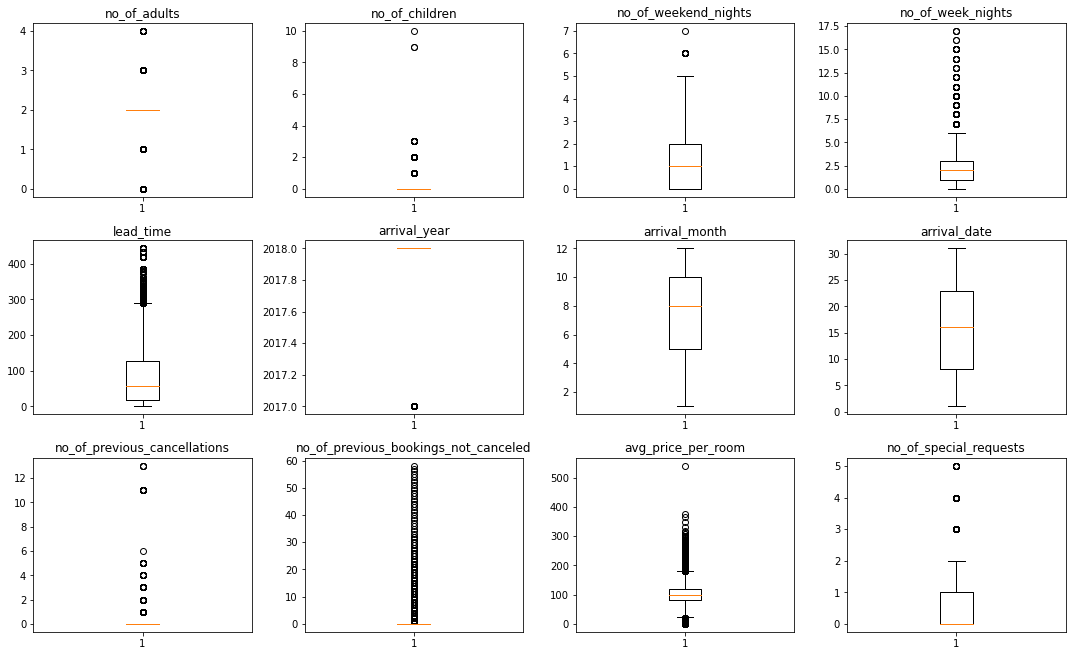

In [17]:
#Checking for outliers in the dataset using boxplot

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
#numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations
Most of the variables in the data set have outliers except the arrival month and arrival date.

However, I will not be treating any outliers in the data set as they seem to be genuine values and might be helpful in creating our model.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help us approach the analysis in the right manner and generate insights from the data.

In [18]:
#defining the function to plot histograms and box charts for all variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
    plt.xlabel(feature, fontsize=15)
    plt.ylabel("Count", fontsize=15)

    #plt.savefig("histbox_"+str(feature)+".png")

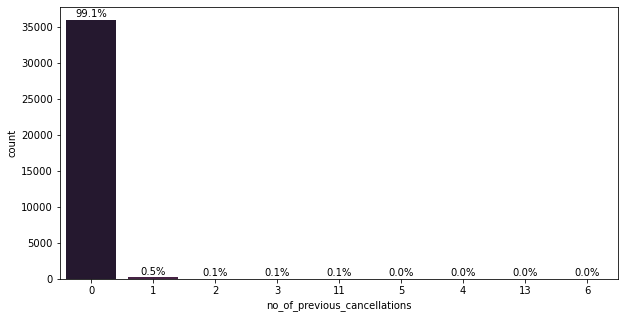

In [19]:

plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'no_of_previous_cancellations', data = df, palette="rocket", order=df['no_of_previous_cancellations'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

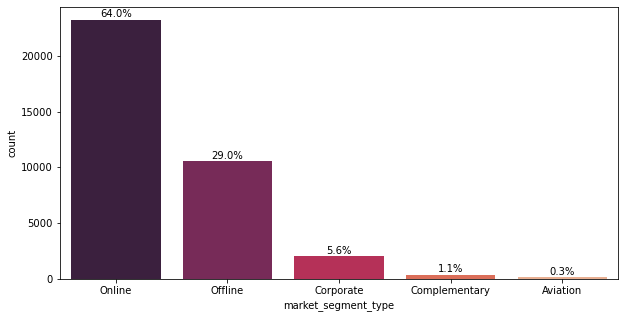

In [20]:
plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'market_segment_type', data = df, palette="rocket", order=df['market_segment_type'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

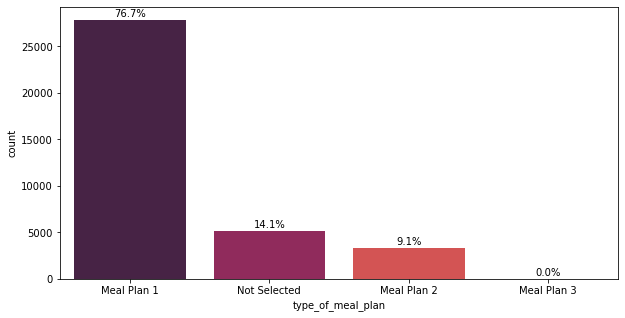

In [21]:

plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'type_of_meal_plan', data = df, palette="rocket", order=df['type_of_meal_plan'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

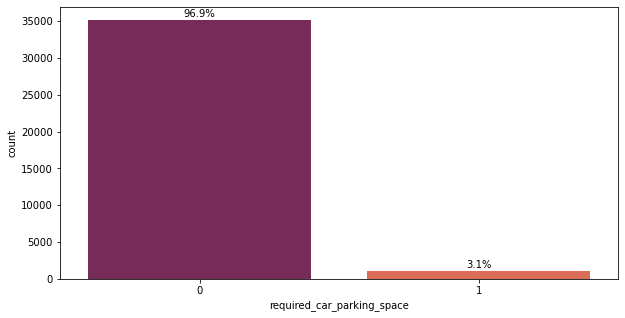

In [22]:

plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'required_car_parking_space', data = df, palette="rocket", order=df['required_car_parking_space'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

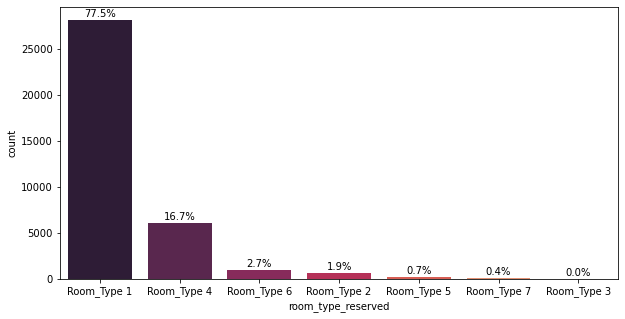

In [23]:

plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'room_type_reserved', data = df, palette="rocket", order=df['room_type_reserved'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

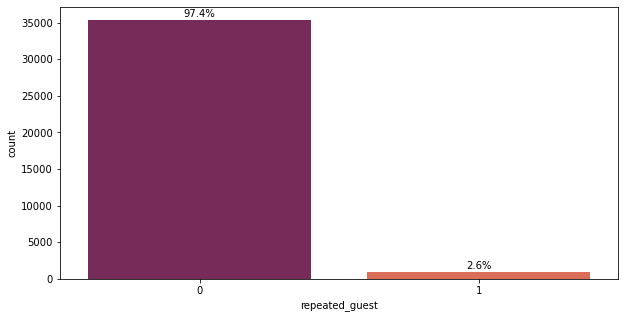

In [24]:

plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'repeated_guest', data = df, palette="rocket", order=df['repeated_guest'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

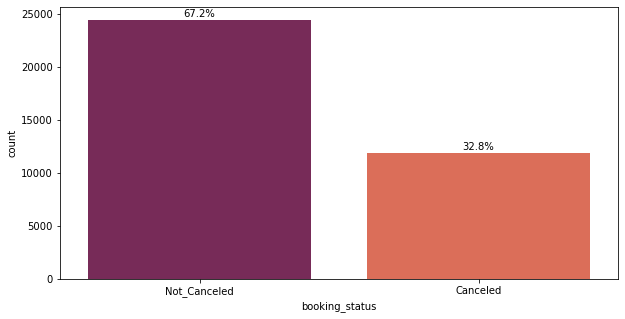

In [25]:

plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'booking_status', data = df, palette="rocket", order=df['booking_status'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

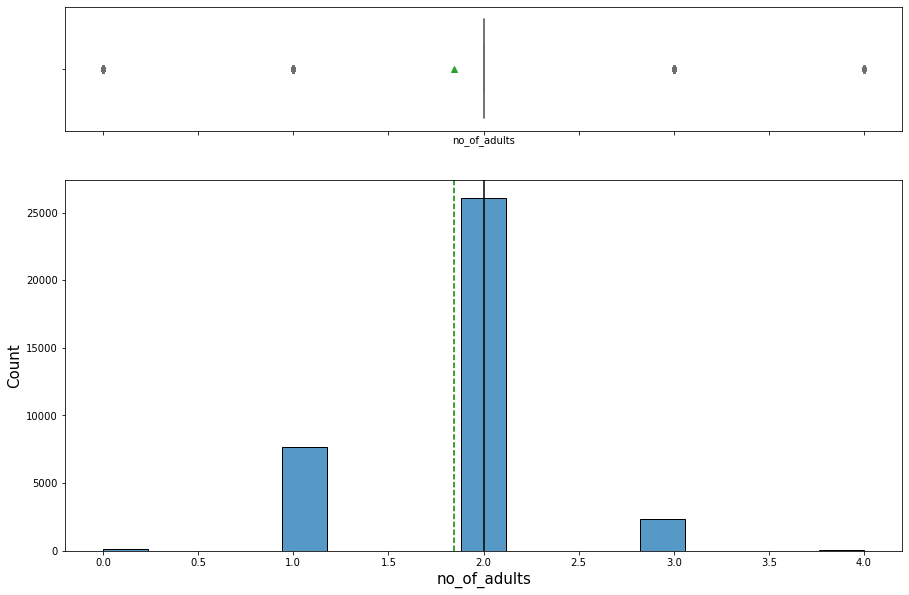

In [26]:
#plotting the boxplot for number of adults
histogram_boxplot(data, "no_of_adults")

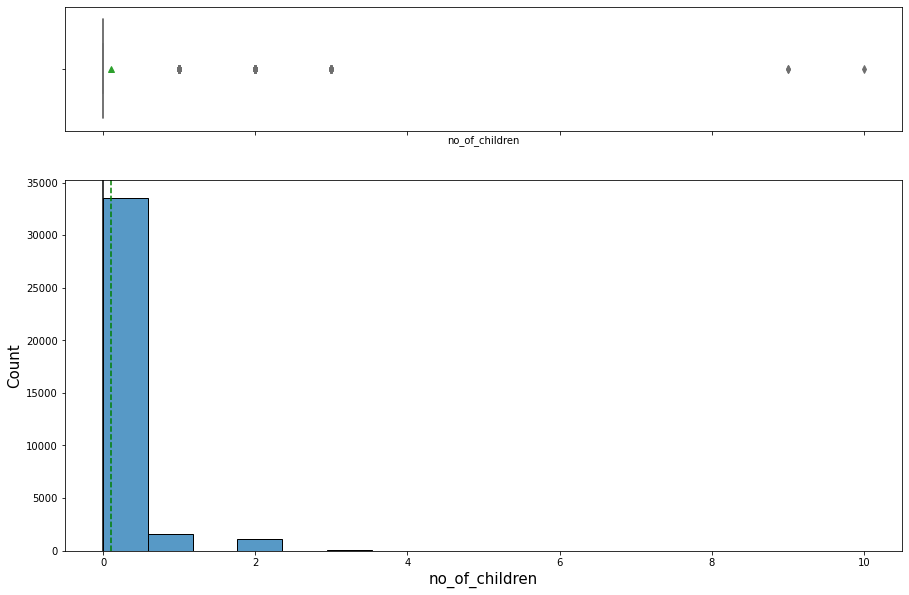

In [27]:
#plotting the boxplot for number of children
histogram_boxplot(data, "no_of_children")

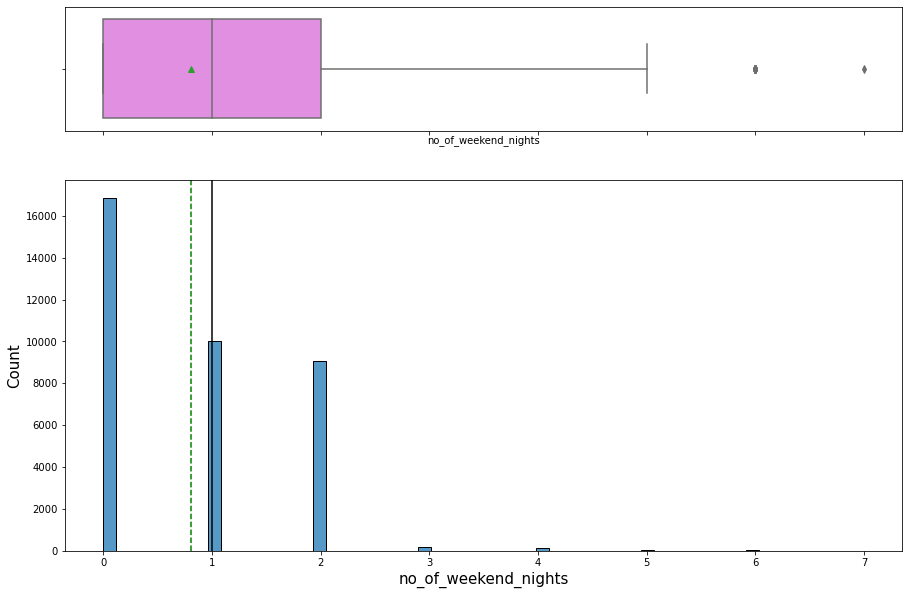

In [28]:
#plotting the boxplot for number of weekend nights
histogram_boxplot(data, "no_of_weekend_nights")

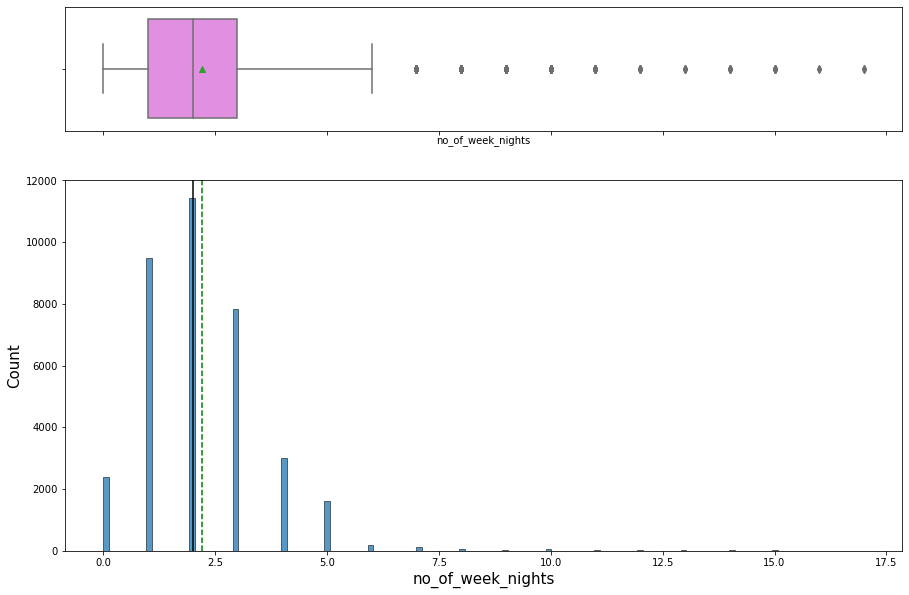

In [29]:
#plotting the boxplot for number of week nights
histogram_boxplot(data, "no_of_week_nights")

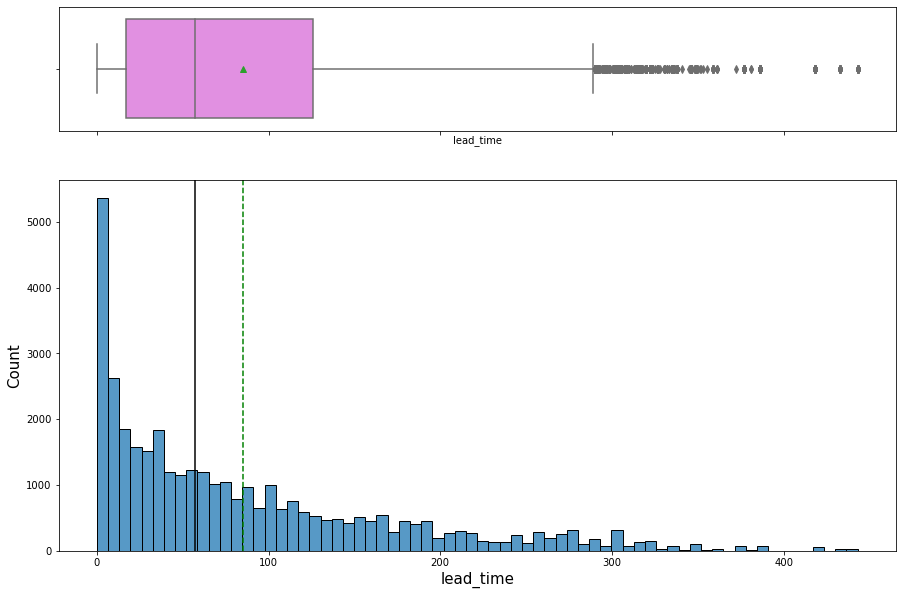

In [30]:
#plotting the boxplot for lead time
histogram_boxplot(data, "lead_time")

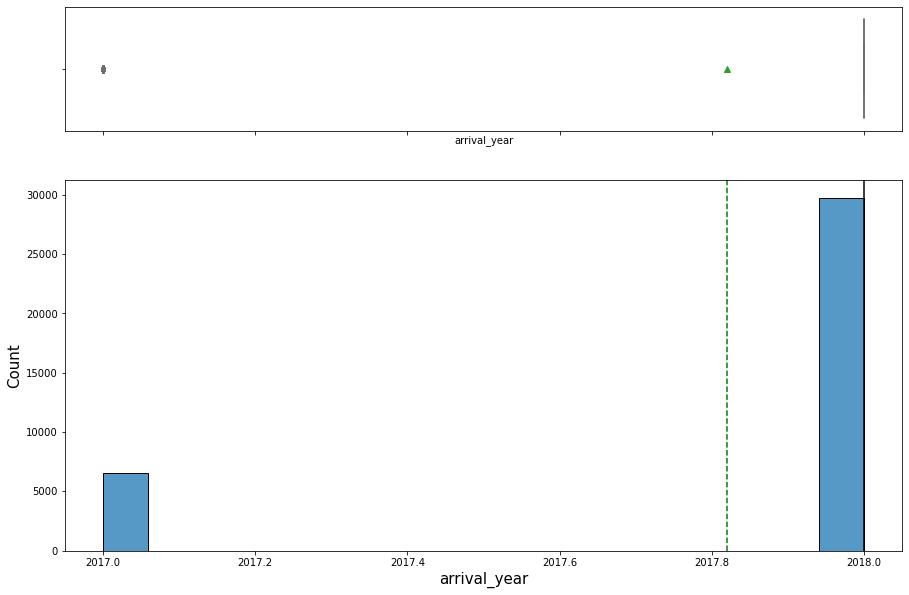

In [31]:
histogram_boxplot(data, "arrival_year")

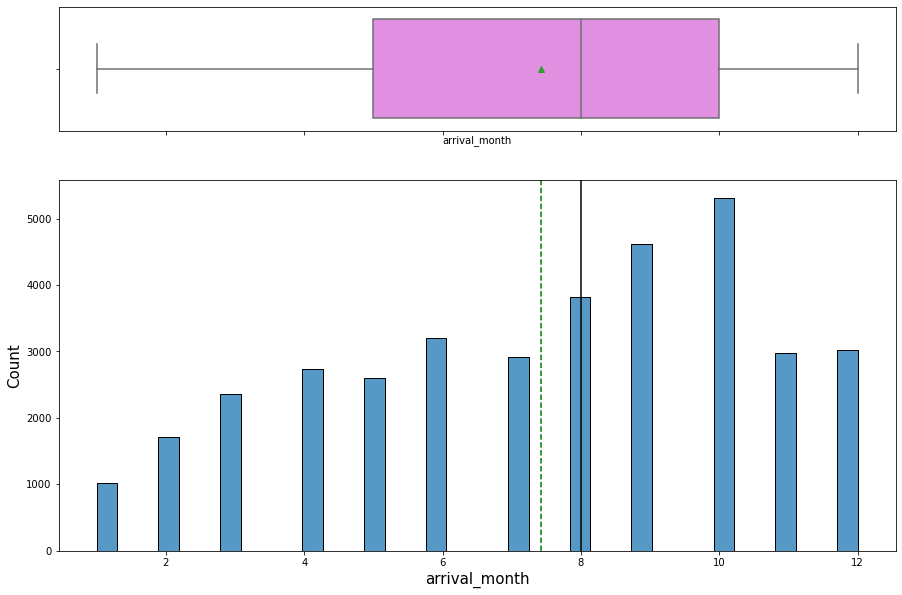

In [32]:
histogram_boxplot(data, "arrival_month")

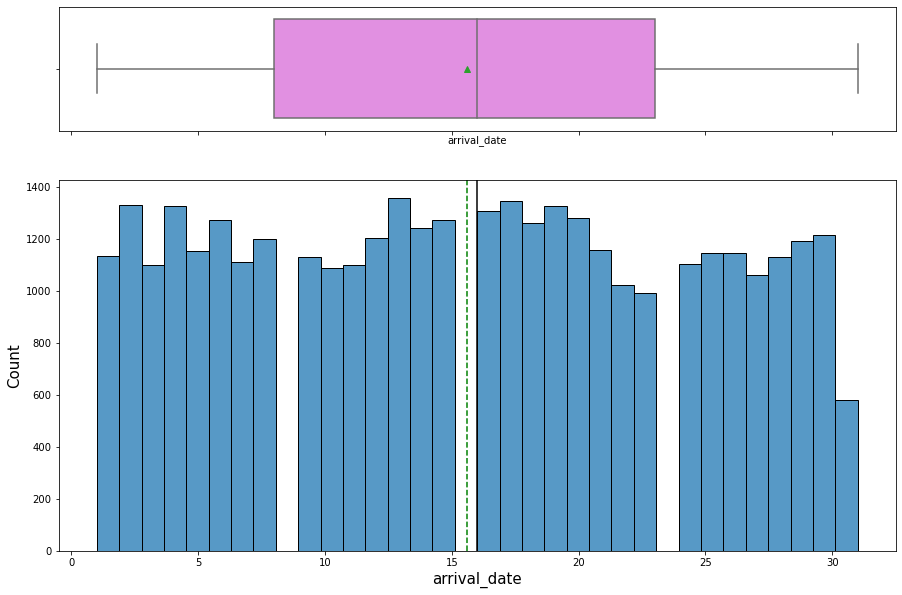

In [33]:
histogram_boxplot(data, "arrival_date")

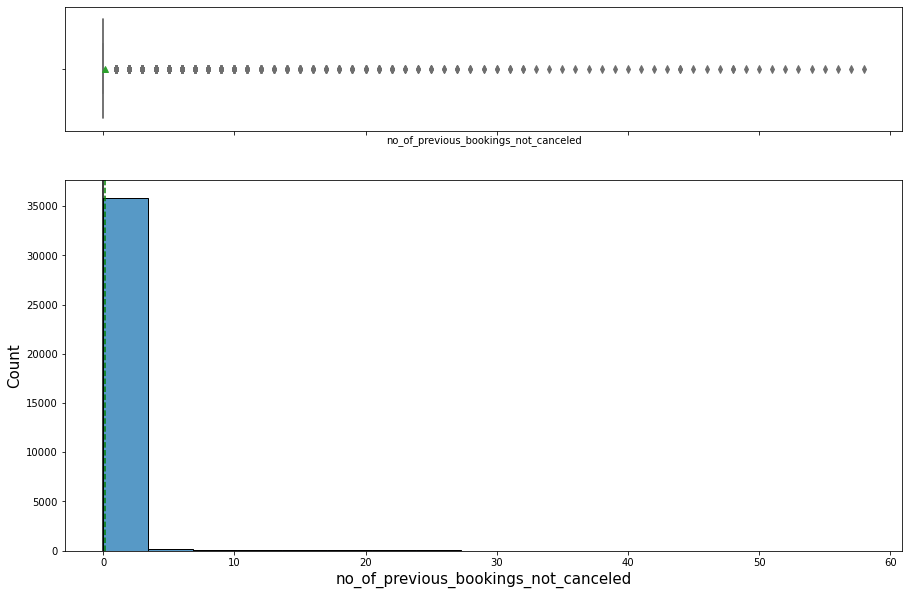

In [34]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

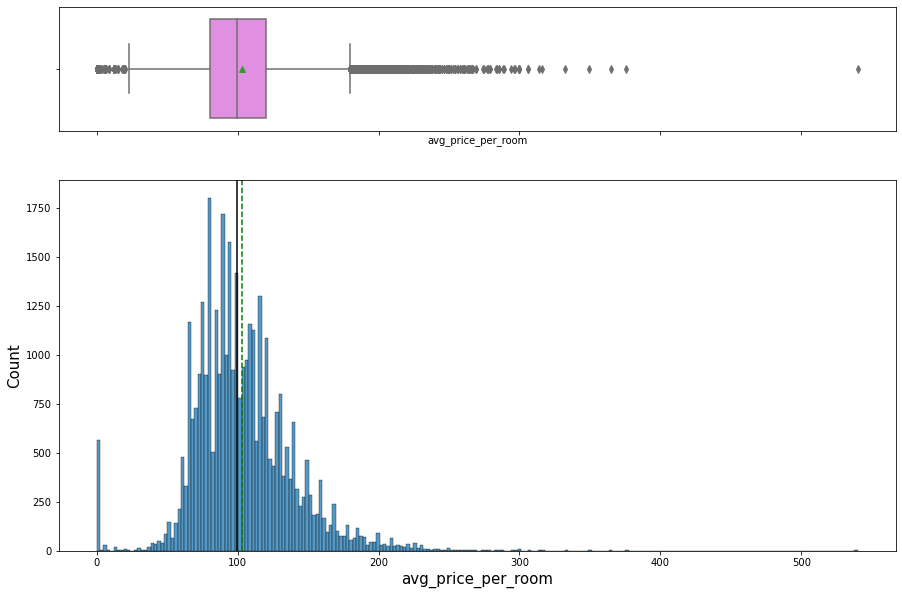

In [35]:
histogram_boxplot(data, "avg_price_per_room")

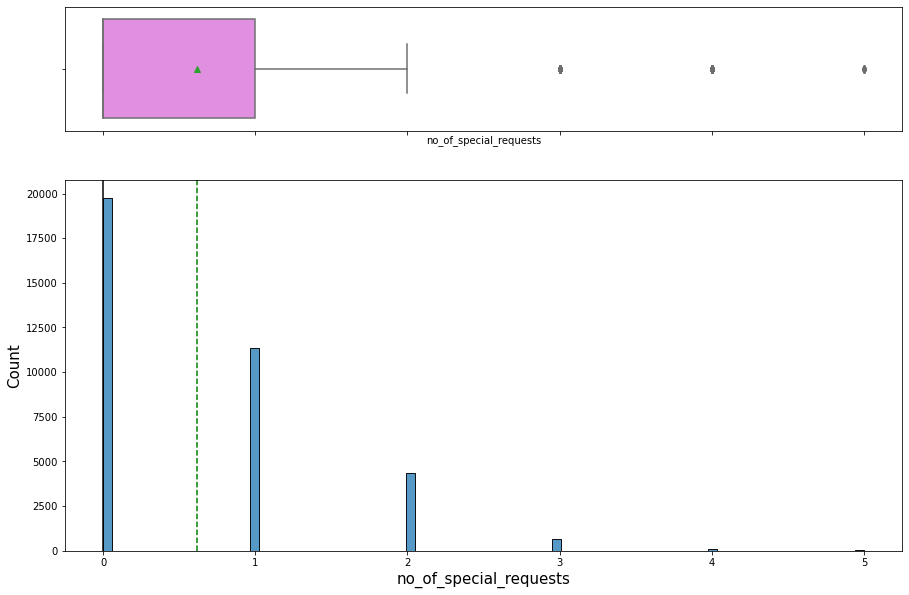

In [36]:
histogram_boxplot(data, "no_of_special_requests")

### Observations from the Univariate analysis
1. Most of the data is skewed and does not have a normal distribution. 
2. The distribution of no of adults is slightly left skewed
3. The distribution for no of children is right skewed with the median being zero
4. There are a lot of outliers in the data set.
5. No of week nights and lead time also shows a right skewed distribution
6. The busiest months at the hotel are October, September, august and june
7. The average price per room is around a hundred dollars
8. Most people do not have speciual requests, but a lot of people usually have one special request while few others have 2,3 or 4 special requests
9. Meal plan 1 is the most selected meal plan. meal plan3 is the least preferred as it has no record of selection
10. Most people do not require parking spaces
11. Room type 1 is the most reserved room type
12. The percentage of repeated guests are very few. 97.4% of them are not
13. The online market segment type is the most prominent, followed by the offline segment.
14. The percentage of bookings canceled are less than half of the bookings not canceled. this shows that the distribution for canceled versus not canceled in not equal, and we cannot rely on the accuracy measure.

## Bivariate Analysis

In [37]:
#Function to create stacked barplots
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    df: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=False).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax=tab.plot(kind="bar", stacked=True, figsize=(15, 5), rot=0)
    
    plt.xlabel(predictor, fontsize=15, rotation=0)
    #plt.ylabel("y", rotation=0)

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    #plt.savefig("stacked_"+str(predictor)+".png")
    plt.show()


booking_status                Canceled  Not_Canceled
no_of_previous_cancellations                        
0                                11869         24068
1                                   11           187
13                                   4             0
3                                    1            42
2                                    0            46
4                                    0            10
5                                    0            11
6                                    0             1
11                                   0            25
------------------------------------------------------------------------------------------------------------------------


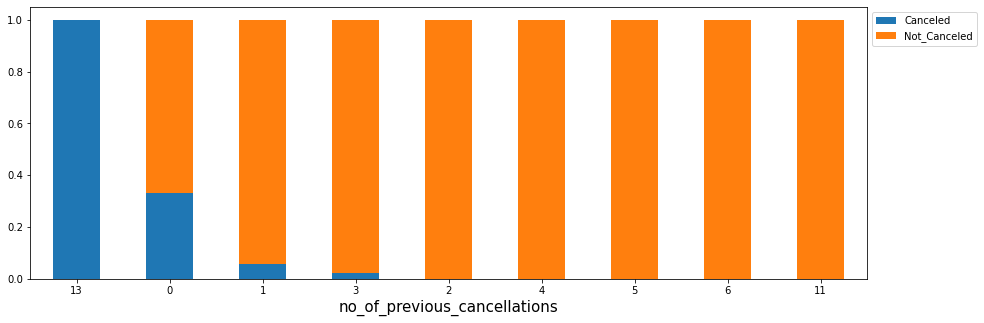

In [38]:
stacked_barplot(df, "no_of_previous_cancellations", "booking_status")

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Not Selected           1699          3431
Meal Plan 2            1506          1799
Meal Plan 3               1             4
------------------------------------------------------------------------------------------------------------------------


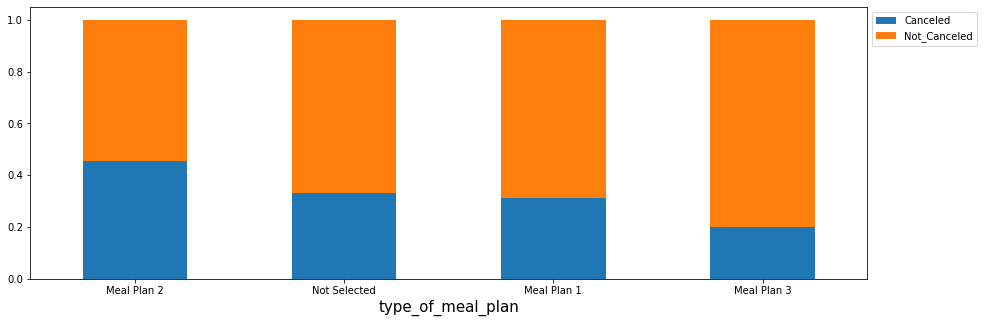

In [39]:
#creating stacked barplots for categorical variables compared to the booking status
stacked_barplot(df, "type_of_meal_plan", "booking_status")

booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1             9072         19058
Room_Type 4             2069          3988
Room_Type 6              406           560
Room_Type 2              228           464
Room_Type 5               72           193
Room_Type 7               36           122
Room_Type 3                2             5
------------------------------------------------------------------------------------------------------------------------


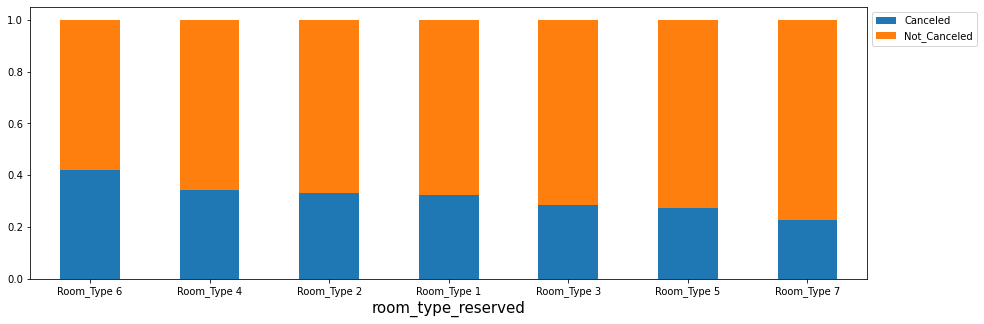

In [40]:
stacked_barplot(df, "room_type_reserved", "booking_status")

booking_status  Canceled  Not_Canceled
arrival_month                         
10                  1880          3437
9                   1538          3073
8                   1488          2325
7                   1314          1606
6                   1291          1912
4                    995          1741
5                    948          1650
11                   875          2105
3                    700          1658
2                    430          1274
12                   402          2619
1                     24           990
------------------------------------------------------------------------------------------------------------------------


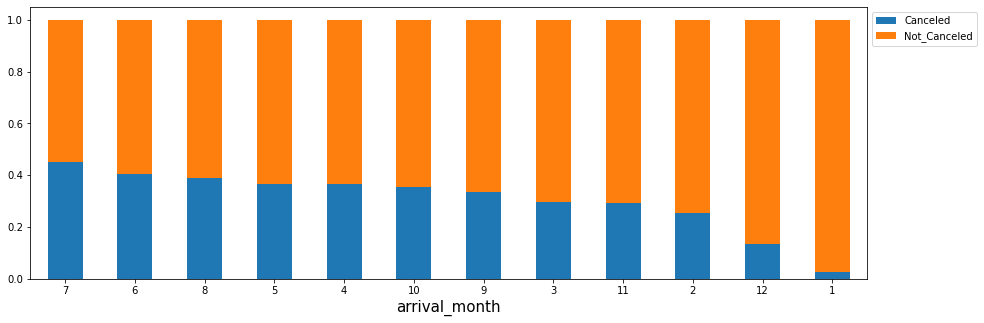

In [41]:
stacked_barplot(df, "arrival_month", "booking_status")

booking_status       Canceled  Not_Canceled
market_segment_type                        
Online                   8475         14739
Offline                  3153          7375
Corporate                 220          1797
Aviation                   37            88
Complementary               0           391
------------------------------------------------------------------------------------------------------------------------


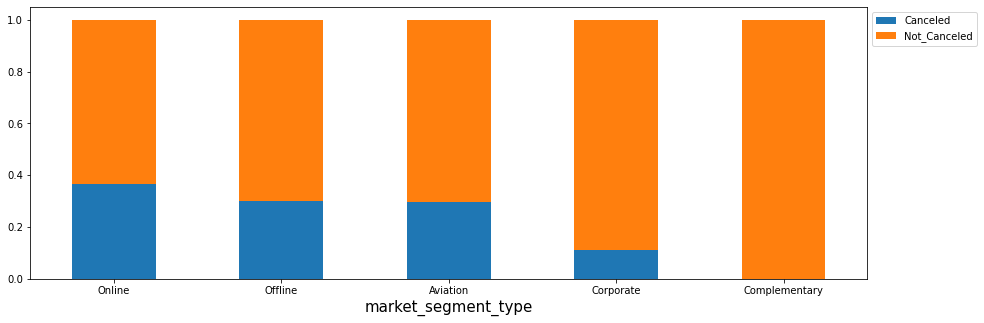

In [42]:
stacked_barplot(df, "market_segment_type", "booking_status")

booking_status              Canceled  Not_Canceled
required_car_parking_space                        
0                              11771         23380
1                                114          1010
------------------------------------------------------------------------------------------------------------------------


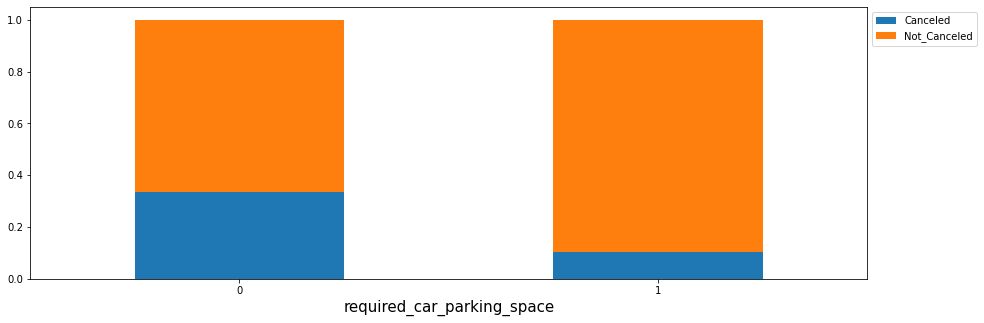

In [43]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

booking_status  Canceled  Not_Canceled
repeated_guest                        
0                  11869         23476
1                     16           914
------------------------------------------------------------------------------------------------------------------------


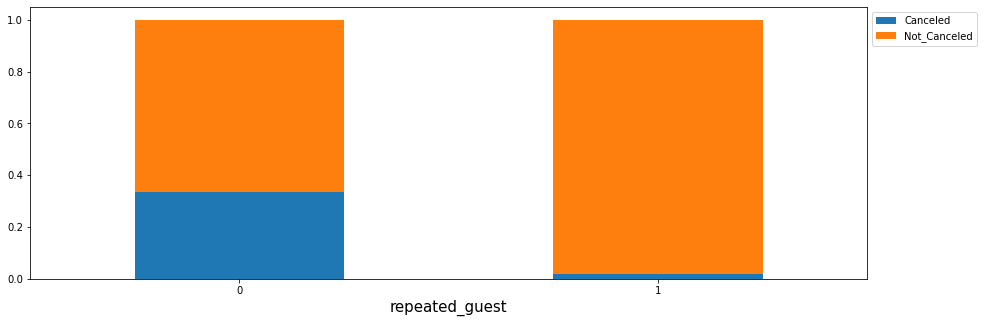

In [44]:
stacked_barplot(df, "repeated_guest", "booking_status")

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
0                           8545         11232
1                           2703          8670
2                            637          3727
3                              0           675
4                              0            78
5                              0             8
------------------------------------------------------------------------------------------------------------------------


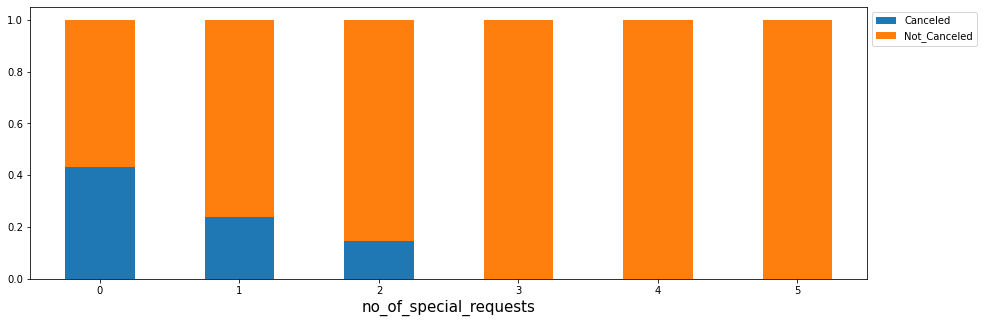

In [45]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

**Date / Target:** We can see that we have the most cancellations(2017, 2018 combined) between the months of June and August with a peak cancellation in July of 45%. The months with the lowest cancellation rate are December January.

**Previous Cancellation / Target** We can see that the people who have canceled their reservation the most are not those who have already canceled in the past. (Most cancellations were made by people who may not have canceled before or who may have never been to this hotel). Also important note, people who have canceled 13 times in the past have always canceled afterwards.

**Market / Target:** We can see that 57.5% of Online market customers have canceled their reservation (We can possibly deduce that this is due to the ease of cancellation). The Offline market and the Aviation market have 42% cancellation (Aviation may be due to unforeseen changes (hypothesis)), while the Corporate market and the Complementary market are the safest and have higher rates. very low cancellation rate, even zero (12% and 0%)

### Observations from the bivariate analysis
1. The highest fraction of canceled bookings came from customers opted for meal plan 2, while the lowest fraction was from meal plan 3. Meal plan 1 had the most bookings.
2. Room type 1 had the most bookings while room type 3 had the least no of bookings, however, the highest fractions of cancellation is from room type 6 and the least from room type7. 
3. The higher the number of special requests, the less likely for the reservation to be canceled.
3. Complementary customer segment never canceled any bookings, which makes sense as they do not pay for the rooms. The online segment has the most cancelations and also the most bookings, followed by the offline segment.This may be because of ease of cancelation and non attachment to the hotel since online customers may not have seen the hotel yet before booking as opposed to offline customers.offline customers are less likely to cancel their bookings, this may be because they walk into the hotel to make the reservations and can get a first hand feel of the rooms and ambience as opposed to online customers For a segment that doesn't make a lot of bookings, the aviation segment cancels a lot as well at a 29.6% cancelation rate. corporate customers cancel the least. 
4. customers who require parking spaces cancel much more than those who do not.
5. The repeated guests barely cancel their bookings. it must be that they enjoy the hotel, hence the decision to repeatedly book it. most bookings and also cancelations come from none repeated guests.


In [46]:
#checking the correlation heat map
#to see the relationship between booking status and the other variables, we need to encode it as 1 and 0
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0\
)

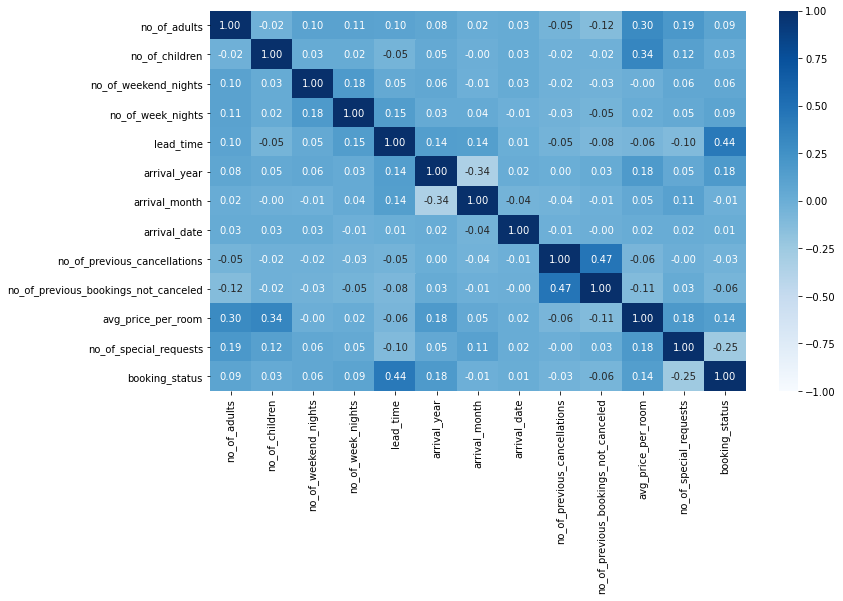

In [47]:
#plotting a correlation heart map
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues"
)
plt.show()

### Observations:
1. There is very little or no correlation between most of the variables and booking status with lead time has the largest correlation with booking status. there is also a very week positive correlation between average price and booking status. 
2. some variables show correlations between each other, e.g no of adults and average price per room, which makes sense because more adults will mean there is a need for a bigger room which would likely cost more. This is also the same case for number of children
3. There is also a positive correlation between the no of previous cancelations and the number of previous bookings not canceled. 
4. Mostly, there are very little or no correlations between all the variables

In [48]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="Blue",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="Grey",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="ocean",
    )

    plt.tight_layout()
    plt.savefig("Distplot_"+str(predictor)+".png")
    plt.show()

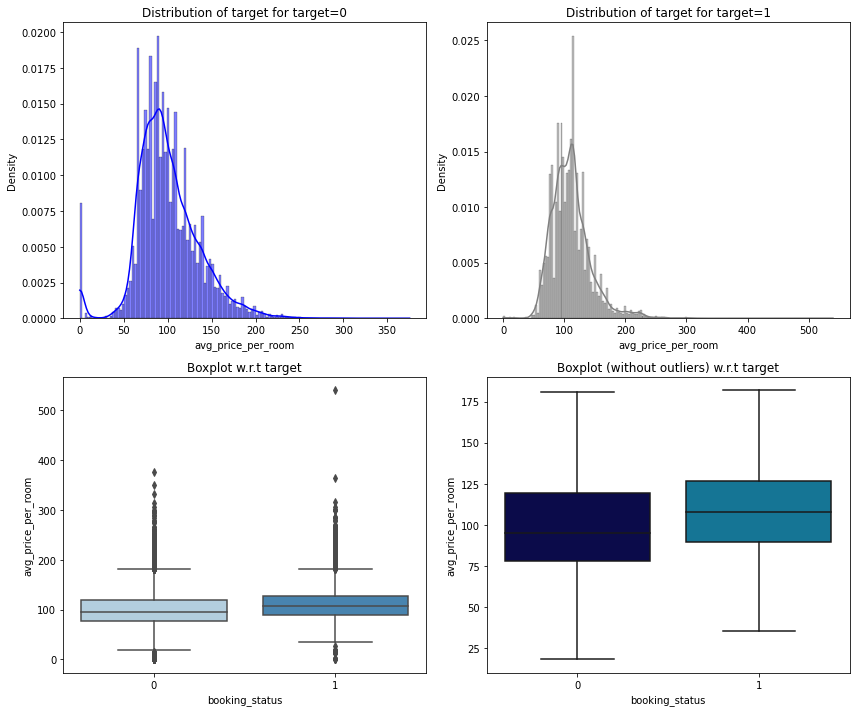

In [49]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

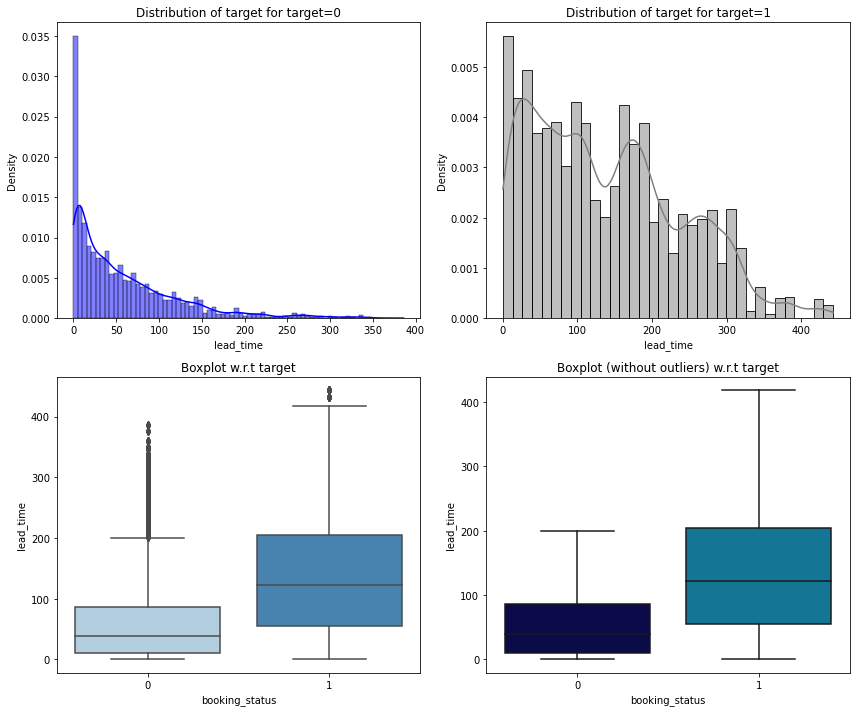

In [50]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

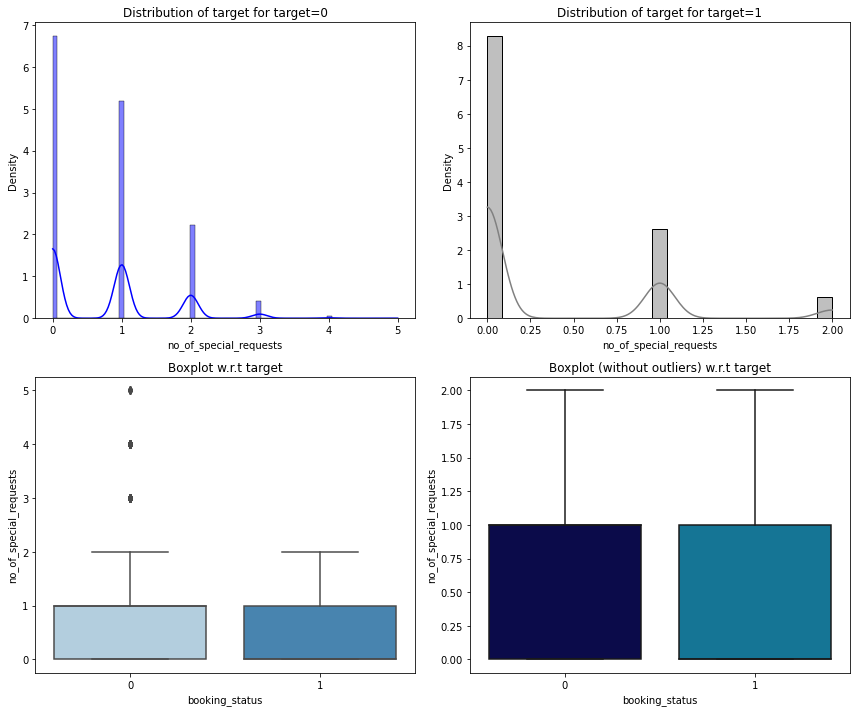

In [51]:
distribution_plot_wrt_target(df, "no_of_special_requests", "booking_status")

Observations from the distribution plots with respect to target
1. the bookings with higher lead time are likely to be canceled. most bookings with lead times of 100 days and below are not canceled.This may be because there is enough time for them to change their minds based on reevaluation of their finances or they might have seen another interesting hotel. The distribution of lead time and canceled bookings in right skewed
2. The bookings are more likely to be canceled when the average price per room is slightly higher. the distribution of average price and canceled bookings is right skewed.
3. When we look at the number of requests with respect to booking status, we also see a right skewed distribution. In the box plot with outliers, it shows that bookings with less special requests are more likely to be canceled than those with more special requests. I would say that this may be due to the fact that people who have multiple special requests may have given a more thorough thought to staying in the hotel.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
7. Does the room type reserved have a relationship with booking status?
8. what is the sum total of revenue loss due to cancellation?

## Question 1
### What are the busiest months in the hotel?

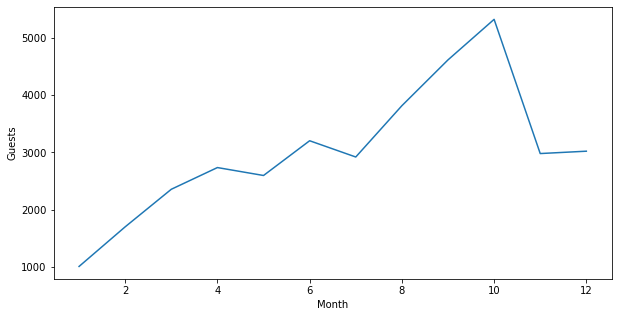

In [52]:
# Checking the arrival months and booking counts
monthly_booking = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_booking = pd.DataFrame(
    {"Month": list(monthly_booking.index), "Guests": list(monthly_booking.values)}
)

# plotting it on a line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_booking, x="Month", y="Guests")

plt.show()

Observation:
The busiest month is October

## Question 2
### Which market segment do most of the guests come from?

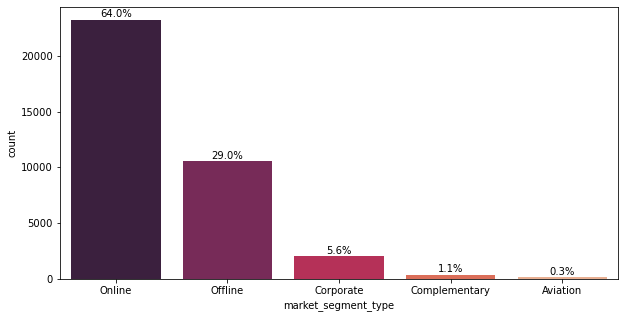

In [53]:
#Creating a labeled barplot to check the market segments and their percentages
plt.figure(figsize=[10,5])
plt.rcParams['axes.facecolor'] = 'white'

ax = sns.countplot(x = 'market_segment_type', data = df, palette="rocket", order=df['market_segment_type'].value_counts().index[:])
#plt.legend(loc = 1);


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

Observations:
Most of the customers come form the online market segment

## Question 3
### What are the differences in room prices in different market segments?

In [54]:
#grouping the market segments by the mean average price per room 

market_segment_type=df.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index()


market_segment_type

,market_segment_type,avg_price_per_room
0,Online,112.25685
1,Aviation,100.70400
2,Offline,91.63268
3,Corporate,82.91174
4,Complementary,3.14176


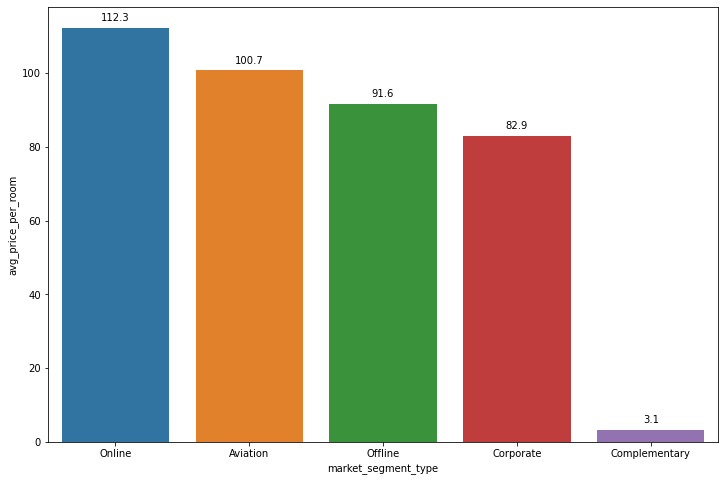

In [55]:
# plotting it on a bar chart

plt.figure(figsize=(12, 8))
ax=sns.barplot(data=market_segment_type, x ='market_segment_type', y='avg_price_per_room')

rects = ax.patches

labels = [f"label{i}" for i in range(len(rects))]

def add_value_labels(ax, spacing=5):
 
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        label = "{:.1f}".format(y_value)
        
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        

add_value_labels(ax)

plt.show()

### Observation
The average price per room for the online segment is the highest, followed by the aviation segment.
The complementary segment has the least price. the offline and corporate segments have room prices below average

## Question 4
### What percentage of bookings are canceled?

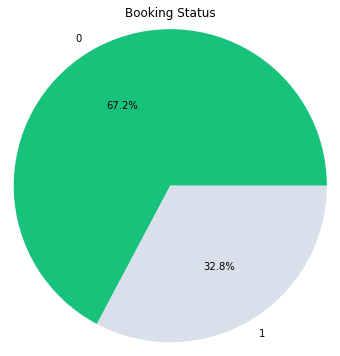

In [56]:
#Checking the percentage of bookings that were canceled and not canceled
booking_status=df['booking_status'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#17C37B','#D9DFEB']
my_pie = plt.pie(booking_status,radius = 1.2, labels=booking_status.index, colors=colors,autopct="%.1f%%")
ax.set_title('Booking Status')
#plt.savefig("pie_booking_status.png")
plt.show()

Observations: 32.8% of the bookings are canceled.

## Question 5
### What percentage of repeating guests cancel?

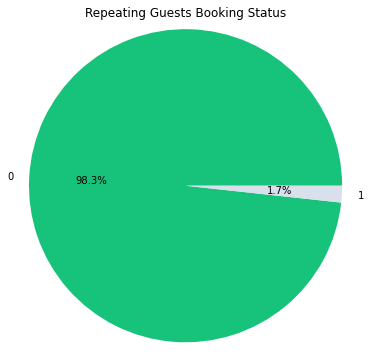

In [57]:
#Creating a data frame for repeating guests
repeating_guest=df[df.repeated_guest == 1]

repeating_guest=repeating_guest['booking_status'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#17C37B','#D9DFEB']
my_pie = plt.pie(repeating_guest,radius = 1.2,labels=repeating_guest.index,colors=colors,autopct="%.1f%%")
ax.set_title('Repeating Guests Booking Status')
#plt.savefig("pie_repeated_guest.png")
plt.show()

Observations: 1.7% of the repeating guests canceled.

## Question 6
### Do special requests affect booking cancellation?

booking_status              0     1
no_of_special_requests             
0                       11232  8545
1                        8670  2703
2                        3727   637
3                         675     0
4                          78     0
5                           8     0
------------------------------------------------------------------------------------------------------------------------


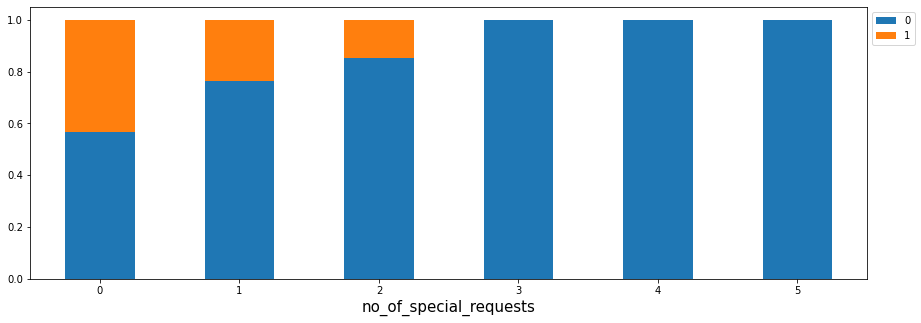

In [58]:
#Checking for patterns between the no of special requests and the booking status
stacked_barplot(df, "no_of_special_requests", "booking_status")

**Observation**

From this stacked barplot, people who had 0 special requests had the most cancelation rates. The people who had 3 or more special requirements did not cancel. The higher the number of special requests, the less likely the reservation will be cancelled.

## Question 7
### Does the room type reserved have a relationship with booking status?

booking_status          0     1
room_type_reserved             
Room_Type 1         19058  9072
Room_Type 4          3988  2069
Room_Type 6           560   406
Room_Type 2           464   228
Room_Type 5           193    72
Room_Type 7           122    36
Room_Type 3             5     2
------------------------------------------------------------------------------------------------------------------------


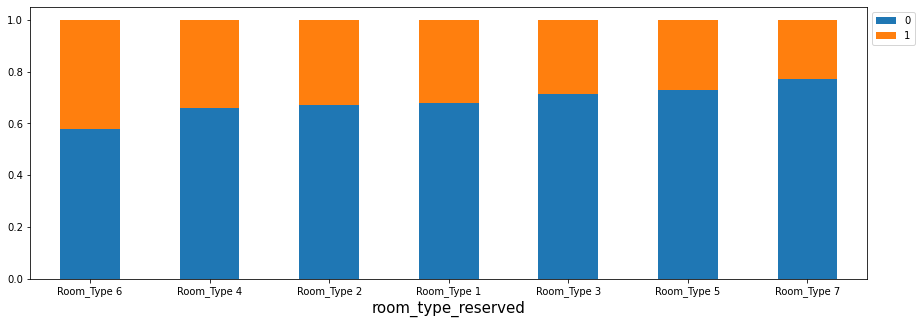

In [59]:
stacked_barplot(df, "room_type_reserved", "booking_status")

Room type 6 has the highest number of cancel rate while Room Type 7 has the least.

## Question 8
### what is the sum total of revenue loss due to cancellation?

   booking_status  avg_price_per_room
0               0       2437327.13000
1               1       1314361.75000


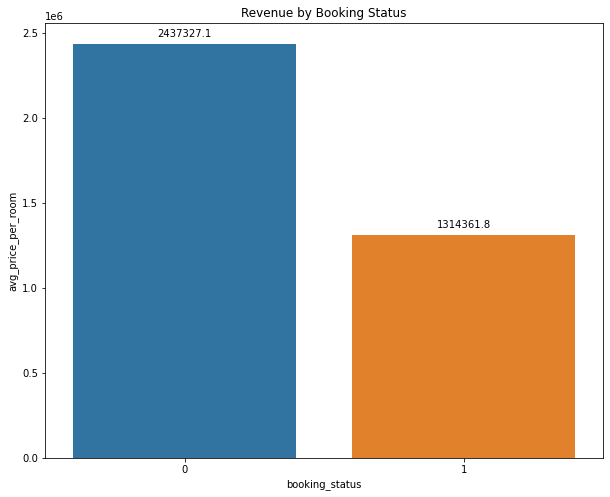

In [60]:
#pd.crosstab(df.booking_status, df.avg_price_per_room)

Total_sum=df.groupby('booking_status').agg({'avg_price_per_room':'sum'}).sort_values(by='avg_price_per_room', ascending=False).reset_index()

print(Total_sum)

plt.figure(figsize=(10, 8))
ax=sns.barplot(data=Total_sum, x ='booking_status', y='avg_price_per_room')

rects = ax.patches

labels = [f"label{i}" for i in range(len(rects))]

def add_value_labels(ax, spacing=5):
 
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        label = "{:.1f}".format(y_value)
        
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        

add_value_labels(ax)

plt.title('Revenue by Booking Status')
#plt.savefig("Revenue_by_booking_Status.png")
plt.show()

The total revenue lost to cancellation is $1,314,361

In [61]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  object  
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  object  
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

## Preparing the data for modeling

In [63]:
#Transforming categorical variables to numbers the model interpret
from sklearn.preprocessing import LabelEncoder

type_of_meal_plan_encoder = LabelEncoder()
df.type_of_meal_plan = type_of_meal_plan_encoder.fit_transform(df.type_of_meal_plan)
print("type_of_meal_plan group include", df.type_of_meal_plan.unique())
print('\n')

room_type_reserved_encoder = LabelEncoder()
df.room_type_reserved = room_type_reserved_encoder.fit_transform(df.room_type_reserved)
print("room_type_reserved group include", df.room_type_reserved.unique())
print('\n')

market_segment_type_encoder = LabelEncoder()
df.market_segment_type = market_segment_type_encoder.fit_transform(df.market_segment_type)
print("market_segment_type group include", df.market_segment_type.unique())
print('\n')

required_car_parking_space_encoder = LabelEncoder()
df.required_car_parking_space = required_car_parking_space_encoder.fit_transform(df.required_car_parking_space)
print("required_car_parking_space group include", df.required_car_parking_space.unique())
print('\n')

repeated_guest_encoder = LabelEncoder()
df.repeated_guest = repeated_guest_encoder.fit_transform(df.repeated_guest)
print("repeated_guest group include", df.repeated_guest.unique())


type_of_meal_plan group include [0 3 1 2]


room_type_reserved group include [0 3 1 5 4 6 2]


market_segment_type group include [3 4 2 0 1]


required_car_parking_space group include [0 1]


repeated_guest group include [0 1]


In [64]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00000,0,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68000,1,0
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00000,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00000,0,1
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50000,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int32  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int32  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [66]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00000,0,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68000,1,0
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00000,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00000,0,1
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50000,0,1


In [67]:
# Correlations
correlations = df.corr()  # this is a dataframe
# let's see how much each attribute correlates with the outcome 'like'
correlations['booking_status'].sort_values(ascending=False)

booking_status                          1.00000
lead_time                               0.43854
arrival_year                            0.17953
avg_price_per_room                      0.14257
market_segment_type                     0.13601
no_of_week_nights                       0.09300
no_of_adults                            0.08692
no_of_weekend_nights                    0.06156
no_of_children                          0.03308
type_of_meal_plan                       0.02671
room_type_reserved                      0.02299
arrival_date                            0.01063
arrival_month                          -0.01123
no_of_previous_cancellations           -0.03373
no_of_previous_bookings_not_canceled   -0.06018
required_car_parking_space             -0.08619
repeated_guest                         -0.10729
no_of_special_requests                 -0.25307
Name: booking_status, dtype: float64

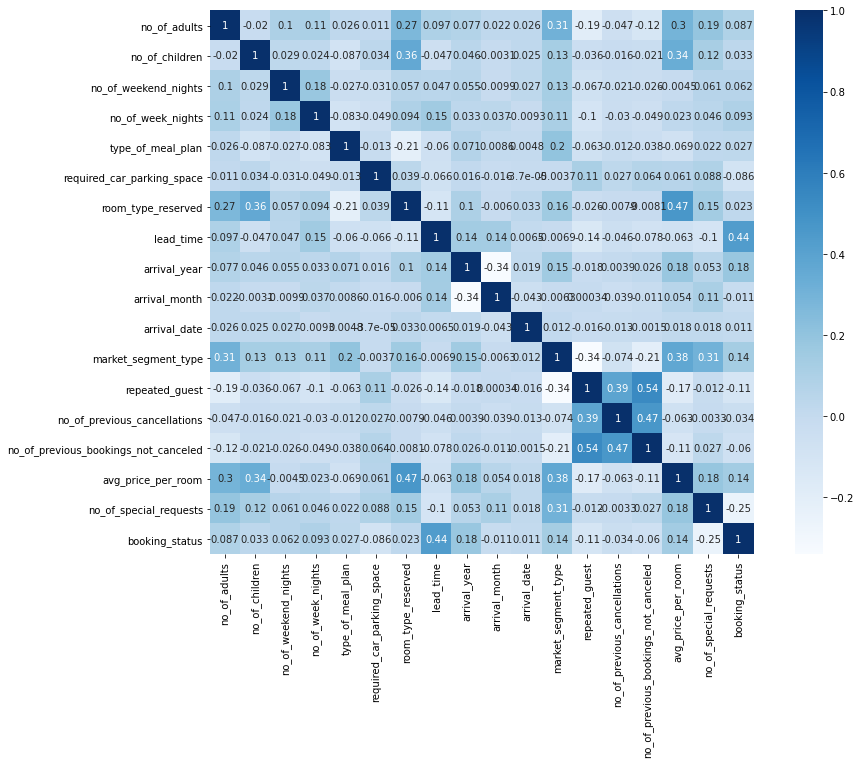

In [68]:
plt.figure(figsize=(15,10))
foo = sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='Blues')

plt.savefig("output.png")

In [69]:
df.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5747,2,0,2,2,3,0,0,52,2018,12,4,4,0,0,0,74.80000,0,1
23271,2,0,0,2,0,0,0,0,2018,3,29,1,0,0,0,0.00000,1,0
34349,1,0,1,2,0,0,0,38,2018,9,19,3,0,0,0,81.00000,1,0
3803,2,2,1,1,0,0,5,46,2018,5,14,4,0,0,0,198.90000,0,1
14583,2,0,2,1,0,1,0,64,2018,6,19,4,0,0,0,117.90000,1,0
30144,2,0,0,1,0,0,0,0,2018,7,22,2,0,0,0,75.00000,0,1
36021,2,0,1,3,0,0,3,83,2018,12,26,4,0,0,0,105.61000,1,0
8185,3,0,1,1,0,0,0,32,2018,4,16,4,0,0,0,142.20000,2,0
11032,2,0,0,2,0,0,0,65,2018,7,27,4,0,0,0,109.90000,1,0
33383,2,2,0,1,0,0,1,4,2017,12,19,4,0,0,0,154.50000,0,0


# Modelling <a id="model"></a>

We have a preprocessed and model ready dataset, now to chose the right model. We are trying to predict which booking will get canceled, so all the models we are testing are **classification** models.

To get an indication of the best model, I will try four baseline models without any tuning. After getting an indication of which model performs best on our dataset, I will use grid search to tune the model hyperparameters to further improve the accuracy.

* **Logistic Regression**
* **KNeighbors Classifier** - Neightbor Classifiers groups data with other data near to it based in a specified k value.
* **Random Forest Classifier** - Random Forest classifiers fits a number of decision treees on subsamples of the dataset to improve the accuracy and redude over-fitting.
* **XGBoost Classifier**- Bootsting Classifiers builds additive models to allow optimization of the downstream models based on loss functions.



**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not fail be canceled but in reality, it is (FN)
- Predicting a booking will be canceled but in reality, it is not (FP)

**Which case is more important?**

- If we predict that a booking will not be canceled but it's canceled in reality, then the company will lose revenue, profit and would have wasted human resources and resourcing on advertising for last minute bookings.

- If we predict that a booking will be canceled but in reality, it's not,it will lead to lack of preparation by the hotel and this will have a ripple effect on their reputation as a hotel and repeatability of customers. They may further get bad reviews and be known for their lack of preparedness.

- Therefore, both cases are important.

**How to reduce the losses?**

The company would want the F1 to be maximized, the greater the F1 score, the higher the chances of minimizing both the False Negatives and false positives

In [70]:

# Libraries to split dataset, build different models, perform hyperparameters tuning and measure model performance


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
)

In [71]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [72]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label", fontsize=13)
    plt.xlabel("Predicted label", fontsize=13)

In [73]:
# SCALE THE DATASET
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

#defining the independent and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

cols = X.columns

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1)

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,-1.62669,-0.26044,1.35986,0.56160,-0.49284,-0.17952,-0.50594,0.34289,0.46794,-1.76847,1.30557,-0.81356,-0.16187,-0.06413,-0.08726,-0.78175,-0.78660
1,0.29956,-0.26044,1.35986,-0.85510,0.46096,-0.17952,-0.50594,0.52848,-2.13702,0.18591,-0.06813,-0.81356,-0.16187,-0.06413,-0.08726,-0.25576,-0.78660
2,0.29956,-0.26044,0.21398,-1.56345,-0.49284,-0.17952,1.63467,-0.80546,0.46794,0.51164,1.19109,0.65570,-0.16187,-0.06413,-0.08726,1.72026,-0.78660
3,0.29956,-0.26044,1.35986,-0.14675,0.46096,-0.17952,-0.50594,0.96926,0.46794,-1.11701,0.73319,-0.81356,-0.16187,-0.06413,-0.08726,0.07121,-0.78660
4,-1.62669,-0.26044,0.21398,-1.56345,-0.49284,5.57054,-0.50594,-0.93305,0.46794,1.48883,-1.21288,-3.75206,6.17764,5.15623,4.50342,-2.94257,0.48539


In [74]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29020, 17)
Shape of test set :  (7255, 17)
Percentage of classes in training set:
0   0.67136
1   0.32864
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67636
1   0.32364
Name: booking_status, dtype: float64


# Comparing Different Classification Models on Default Parameters

In [75]:
# LOGISTIC REGRESSION CLASSIFIER

LR = LogisticRegression()
LR.fit(X_train,y_train)

# Check the scores using the predefined function

LR_metrics_Train = model_performance_classification_sklearn(LR, X_train, y_train)
LR_metrics_Test = model_performance_classification_sklearn(LR, X_test, y_test)

print(f'LR Train Scores: \n{LR_metrics_Train}\n\nLR Test Scores:\n {LR_metrics_Test}\n')

# ================================================================================================

# RANDOM FOREST CLASSIFIER

RF = RandomForestClassifier(random_state=1)      
RF.fit(X_train,y_train)

# Check the scores using the predefined function

RF_metrics_Train = model_performance_classification_sklearn(RF, X_train, y_train)
RF_metrics_Test = model_performance_classification_sklearn(RF, X_test, y_test)

print(f'RF Train Scores: \n{RF_metrics_Train}\n\nRF Test Scores:\n {RF_metrics_Test}\n')

# ================================================================================================

# KNN CLASSIFIER

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

# Check the scores using the predefined function

KNN_metrics_Train = model_performance_classification_sklearn(KNN, X_train, y_train)
KNN_metrics_Test = model_performance_classification_sklearn(KNN, X_test, y_test)

print(f'KNN Train Scores: \n{KNN_metrics_Train}\n\nKNN Test Scores:\n {KNN_metrics_Test}\n')

# ================================================================================================

# XGB CLASSIFIER

XGB = XGBClassifier(random_state = 1)
XGB.fit(X_train, y_train)

# Check the scores using the predefined function

XGB_metrics_Train = model_performance_classification_sklearn(XGB, X_train, y_train)
XGB_metrics_Test = model_performance_classification_sklearn(XGB, X_test, y_test)

print(f'XGB Train Scores: \n{XGB_metrics_Train}\n\nXGB Test Scores:\n {XGB_metrics_Test}\n')

LR Train Scores: 
   Accuracy  Recall  Precision      F1
0   0.80682 0.62221    0.74764 0.67918

LR Test Scores:
    Accuracy  Recall  Precision      F1
0   0.80165 0.60392    0.73586 0.66339

RF Train Scores: 
   Accuracy  Recall  Precision      F1
0   0.99376 0.98763    0.99336 0.99048

RF Test Scores:
    Accuracy  Recall  Precision      F1
0   0.90765 0.81644    0.88915 0.85124

KNN Train Scores: 
   Accuracy  Recall  Precision      F1
0   0.91692 0.85090    0.89137 0.87066

KNN Test Scores:
    Accuracy  Recall  Precision      F1
0   0.85279 0.75000    0.78546 0.76732

XGB Train Scores: 
   Accuracy  Recall  Precision      F1
0   0.91747 0.84461    0.89819 0.87058

XGB Test Scores:
    Accuracy  Recall  Precision      F1
0   0.89318 0.80281    0.85799 0.82948



## Model Comparison (Default Parameters)

In [82]:
# test performance comparison

models_comp_df = pd.concat(
    [
        LR_metrics_Test.T,
        RF_metrics_Test.T,
        KNN_metrics_Test.T,
        XGB_metrics_Test.T,
    ],
    axis=1,
)
models_comp_df.columns = [
    "LR Test (default)",
    "RF Test (default)",
    "KNN Test (default)",
    "XGB Test (default)",
]

print("Test performance comparison:")
models_comp_df

Test performance comparison:


,LR Test (default),RF Test (default),KNN Test (default),XGB Test (default)
Accuracy,0.80165,0.90765,0.85279,0.89318
Recall,0.60392,0.81644,0.75000,0.80281
Precision,0.73586,0.88915,0.78546,0.85799
F1,0.66339,0.85124,0.76732,0.82948


## Comparing Models using Cross Validation Score

In [77]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, 
                     X_train, 
                     y_train, 
                     cv=5)

print(f'LogisticRegression: \n{cv}\nAverage: {cv.mean()}\n')

knn = KNeighborsClassifier()
cv = cross_val_score(knn, 
                     X_train, 
                     y_train, 
                     cv=5)

print(f'KNeighborsClassifier: \n{cv}\nAverage: {cv.mean()}\n')

rf = RandomForestClassifier(random_state=42)
cv = cross_val_score(rf, 
                     X_train, 
                     y_train, 
                     cv=5)

print(f'RandomForestClassifier: \n{cv}\nAverage: {cv.mean()}\n')

xgb = XGBClassifier(random_state = 42)
cv = cross_val_score(xgb, 
                     X_train, 
                     y_train, 
                     cv=5)

print(f'XGBClassifier: \n{cv}\nAverage: {cv.mean()}\n')

LogisticRegression: 
[0.81237078 0.81133701 0.80737422 0.80117161 0.8015162 ]
Average: 0.8067539627842868

KNeighborsClassifier: 
[0.84751895 0.84062715 0.84631289 0.83700896 0.84993108]
Average: 0.8442798070296348

RandomForestClassifier: 
[0.90248105 0.89972433 0.89645072 0.89438318 0.90161957]
Average: 0.8989317711922812

XGBClassifier: 
[0.8938663  0.88473467 0.8871468  0.88835286 0.89179876]
Average: 0.8891798759476224



* Random Forest Classifier has the best mean score, followed by XGB Classifier.
* I will run a grid search on all four models, as well as see their performances on the test set 
* After the grid search has been run, i will compare all models and make the final inference. 

# Model Tuning - Hyperparameter GridSearch <a id="tuning"></a>

In [78]:
def model_performance(model, name):
    print(name)
    print(f'Best Score: {model.best_score_}\n')
    print(f'Best Parameters: {model.best_params_}\n')
    print(f'Test Performance:\n{model_performance_classification_sklearn(model, X_test, y_test)}\n')


    
lr = LogisticRegression()

parameter_grid = {'max_iter' : [2000],
                  'penalty' : ['l1', 'l2'],
                  'C' : np.logspace(-4, 4, 20),
                  'solver' : ['liblinear'
                  ]}

lr_model = GridSearchCV(lr, 
                        param_grid=parameter_grid, 
                        cv=5, 
                        verbose=True, 
                        n_jobs=1)
best_lr_model = lr_model.fit(X_train, y_train)
model_performance(best_lr_model, 'LogisticRegression')

#======================================================================

knn = KNeighborsClassifier()

parameter_grid = {'n_neighbors' : [3,5,7,9],
                  'weights' : ['uniform', 'distance'],
                  'algorithm' : ['auto', 'ball_tree','kd_tree'],
                  'p' : [1,2]}

knn_model = GridSearchCV(knn, 
                         param_grid=parameter_grid, 
                         cv=5, 
                         verbose=True, 
                         n_jobs=-1)
best_knn_model = knn_model.fit(X_train, y_train)
model_performance(best_knn_model, 'KNN')

#======================================================================

rf = RandomForestClassifier(random_state=1)

parameter_grid = {'n_estimators': [100,500], 
                  'bootstrap': [True,False],
                  'max_depth': [10,20,50,75,None],
                  'max_features': ['auto','sqrt'],
                  'min_samples_leaf': [1,2,4],
                  'min_samples_split': [2,5,10]}
                                  
rf_model_randomcv = RandomizedSearchCV(rf, 
                                param_distributions=parameter_grid, 
                                n_iter=50, 
                                cv=5, 
                                verbose=True, 
                                n_jobs=-1)
best_rf_model_randomcv = rf_model_randomcv.fit(X_train, y_train)
model_performance(best_rf_model_randomcv, 'Random Forest (RandSearchCV)')

#======================================================================

rf = RandomForestClassifier(random_state=1)

parameter_grid = {'n_estimators': [500,550,600],
                  'criterion':['gini'],
                  'bootstrap': [True],
                  'max_depth': [10, 15, 20],
                  'max_features': ['auto','sqrt', 10],
                  'min_samples_leaf': [2,3],
                  'min_samples_split': [2,3]}
                                  
rf_model = GridSearchCV(rf, 
                      param_grid = parameter_grid, 
                      cv=5, 
                      verbose=True, 
                      n_jobs=-1)
best_rf_model = rf_model.fit(X_train, y_train)
model_performance(best_rf_model, 'Random Forest (GridSearchCV)')

#======================================================================

xgb = XGBClassifier(random_state=1)

parameter_grid = {
              'n_estimators': [450,500,550],
              'colsample_bytree': [0.75,0.8,0.85],
              'max_depth': [None],
              'reg_alpha': [1],
              'reg_lambda': [2, 5, 10],
              'subsample': [0.55, 0.6, .65],
              'learning_rate':[0.5],
              'gamma':[.5,1,2],
              'min_child_weight':[0.01],
              'sampling_method': ['uniform']}

xgb_model = GridSearchCV(xgb, 
                         param_grid=parameter_grid, 
                         cv=5, 
                         verbose=True, 
                         n_jobs=-1)

best_xgb_model = xgb_model.fit(X_train, y_train)

model_performance(best_xgb_model, 'XGB')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
LogisticRegression
Best Score: 0.8069951757408684

Best Parameters: {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}

Test Performance:
   Accuracy  Recall  Precision      F1
0   0.80207 0.60434    0.73676 0.66401

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8679186767746382

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Test Performance:
   Accuracy  Recall  Precision      F1
0   0.87071 0.77555    0.81586 0.79520

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest (RandSearchCV)
Best Score: 0.8993452791178498

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 75, 'bootstrap': False}

Test Performance:
   Accuracy  Recall  Precision      F1
0   0.90986 0.81857    0.89395 0.85460

Fitting 5 folds for each of 108 can

# Comparison of Models (Default Parameters vs Tuned Parameters)

In [79]:
# LOGISTIC REGRESSION CLASSIFIER

Best_LR_metrics_Test = model_performance_classification_sklearn(best_lr_model, X_test, y_test)


# RANDOM FOREST CLASSIFIER

Best_RF_metrics_Test = model_performance_classification_sklearn(best_rf_model_randomcv, X_test, y_test)


# KNN CLASSIFIER

Best_KNN_metrics_Test = model_performance_classification_sklearn(best_knn_model, X_test, y_test)


# XGB CLASSIFIER

Best_XGB_metrics_Test = model_performance_classification_sklearn(best_xgb_model, X_test, y_test)

# tuned-default test performance comparison

models_comp_df = pd.concat(
    [
        LR_metrics_Test.T,
        Best_LR_metrics_Test.T,
        RF_metrics_Test.T,
        Best_RF_metrics_Test.T,
        KNN_metrics_Test.T,
        Best_KNN_metrics_Test.T,
        XGB_metrics_Test.T,
        Best_XGB_metrics_Test.T,
    ],
    axis=1,
)
models_comp_df.columns = [
    "LR Test (Default)",
    "LR Test Tuned",
    "RF Test (Default)",
    "RF Test Tuned",
    "KNN Test (Default)",
    "KNN Test Tuned",
    "XGB Test (Default)",
    "XGB Test Tuned",
]

print("Test performance comparison:")
models_comp_df

Test performance comparison:


,LR Test (Default),LR Test Tuned,RF Test (Default),RF Test Tuned,KNN Test (Default),KNN Test Tuned,XGB Test (Default),XGB Test Tuned
Accuracy,0.80165,0.80207,0.90765,0.90986,0.85279,0.87071,0.89318,0.89304
Recall,0.60392,0.60434,0.81644,0.81857,0.75000,0.77555,0.80281,0.81346
Precision,0.73586,0.73676,0.88915,0.89395,0.78546,0.81586,0.85799,0.84964
F1,0.66339,0.66401,0.85124,0.85460,0.76732,0.79520,0.82948,0.83116


- The Best Model is the Random Forest tuned with Random Search CV
- The model stands out, all the metrics are better than the other three models when compared.
- The model gives a accuracy, recall, Precision, and f1_score of 0.90986, 0.81857, 0.89395, and 0.85460 on the test sets respectively
- As the train and test performances are comparable, the models are not overfitting
- So far, we have a good model, however we can perform some more feature engineering to see if we can get a model with much better scores.

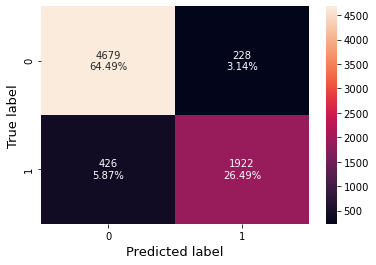

In [80]:
# Checking the Confusion Matrix of the best model
confusion_matrix_sklearn(best_rf_model_randomcv, X_test, y_test)

* The model has the best F1 score, so it relatively increased the predicting capacity of the model.

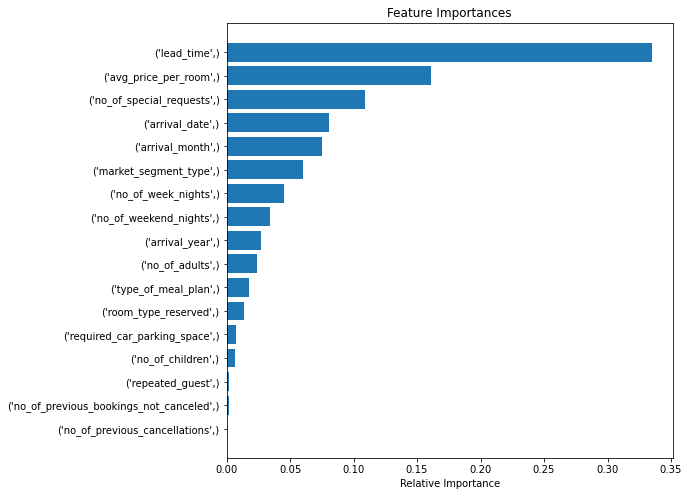

In [90]:
#Checking important features of the best model
feature_names = list(X_train.columns)
importances = best_rf_model_randomcv.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig('Feature Importance.png')
plt.show()

## Actionable Insights and Recommendations

### InnHotels can implement one or more of these policies for cancellation and refund 
- Inn Hotels may implement a cancellation policy requiring customers to pay a percentage of the average room rate if they cancel within a certain timeframe before their arrival dates. For instance, they may charge 10% if the cancellation is made a month before arrival.
- Inn Hotels could opt for a gradient cancellation payment structure based on the average lead time of canceled bookings, which is approximately 95 days. They could charge 10% for cancellations made a month before arrival, 20% for cancellations made 3 weeks prior, half the room price for cancellations made 2 weeks before arrival, and the full price for cancellations made around 3 days before arrival since preparations would have already been made.
- Additionally, they may consider implementing a no-refund policy where customers are allowed to shift their booking dates a certain number of days to arrive, but not cancel their bookings outright.
-	For online bookings, Inn Hotels can charge a non-refundable booking fee that will be deductible from the average room price upon successful booking.
-	Alternatively, the hotel can include a clause for online bookings stating that rooms will become unreserved after a specific period if payment is not made, and customers will need to reconfirm the availability of the room type before rebooking.
-	Alternatively, the hotel can include a clause for online bookings stating that rooms will become unreserved after a specific period if payment is not made, and customers will need to reconfirm the availability of the room type before rebooking.
-	To increase the likelihood of customers following through with bookings for higher-priced rooms, Inn Hotels can offer additional services such as free breakfast, laundry or spa treatments. However, the hotel needs to research competitors' pricing to ensure that their room rates are competitive and offer value for money.
-	Based on exploratory data analysis, most bookings and cancellations occur between August and December, possibly due to high demand. To encourage bookings during less busy months, Inn Hotels can create a fun summer/spring schedule with activities and offer discounts on room rates. However, this should be carefully considered to ensure profitability.
-	The corporate market segment has a lower likelihood of cancellations due to fixed business trips. Inn Hotels can partner with corporations and businesses to become their preferred hotel, encouraging upfront payments for business trip bookings in the hotel's location and offering benefits for doing so.
-	Inn Hotels should research why customers are more likely to cancel bookings for room type 1 and why room type 3 is seldom booked. They can offer discounts on these rooms for a period of time and gather feedback from guests who stay in them to improve the quality of their offerings.
-	To encourage repeat business, Inn Hotels can offer special services or discounts to repeat guests, such as meal plan upgrades, room upgrades, and free parking. Referral benefits can also be introduced to incentivize guests to refer others to the hotel, thereby promoting customer retention while reducing advertising costs.